In [20]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [21]:

df=pd.read_csv("kc_house_data.csv",delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df.isnull().sum().sum()

0

No null values

here target variable=price and other are feature variables

In [24]:
df.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


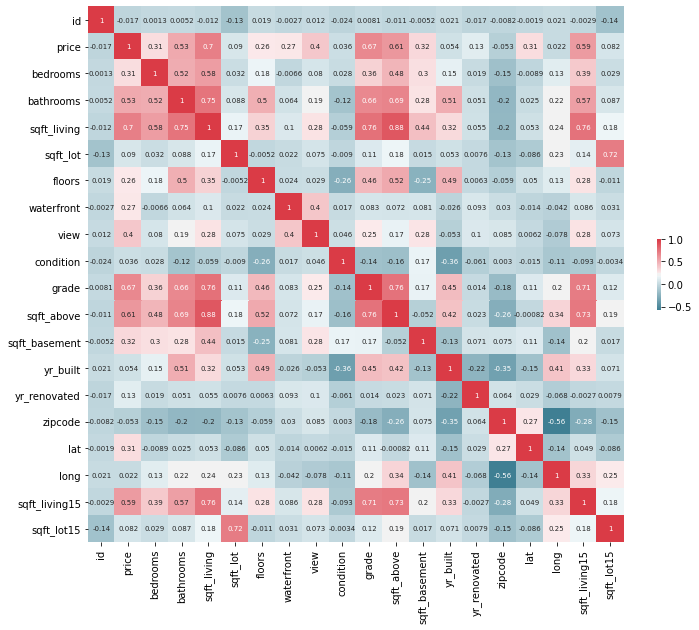

In [25]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .13 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 7 }

        )
    
plot_correlation_map(df)

In [26]:
#Correlation
pd.DataFrame(df.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


From the data Set remaining features will be: (bedrooms	bathrooms	sqft_living	floors	waterfront	view	condition	gradesqft_above	sqft_basement	yr_renovated	lat	sqft_living15) as they correlate with price. The deleted features don't contribute to price (very little correlation <=0.054).

In [27]:
# Drop the non contribution variables here
unwanted = ['id','zipcode','long','yr_built','sqft_lot15','sqft_lot','condition']
df.drop(unwanted,axis=1,inplace=True)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


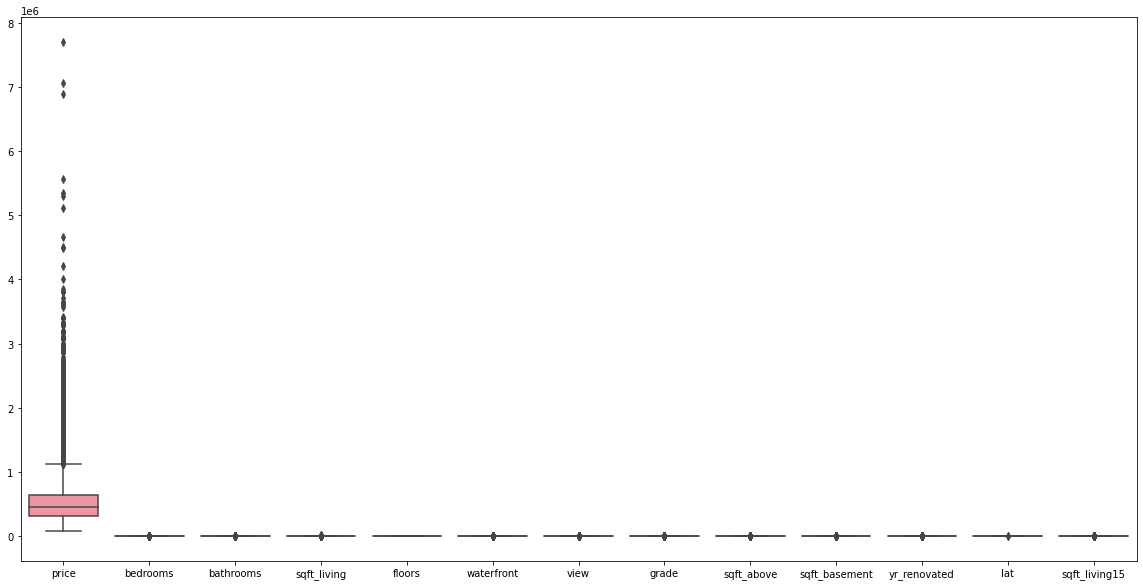

In [29]:
#Detecting Outliers
import matplotlib as plt
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)

In [30]:
#Let's create new columns of month and year sold in our dataset
df['date']=pd.to_datetime(df['date'])
df['month_sold']=df['date'].apply(lambda date: date.month)
df['year_sold']=df['date'].apply(lambda date: date.year)


In [31]:
df.drop('date',axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,month_sold,year_sold
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340,10,2014
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690,12,2014
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720,2,2015
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360,12,2014
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800,2,2015


In [32]:
# change order of the columns
df = df[['price','sqft_living','grade','sqft_above','bedrooms','bathrooms','floors','waterfront','view','sqft_basement','yr_renovated','lat','sqft_living15']]
df.head()

,price,sqft_living,grade,sqft_above,bedrooms,bathrooms,floors,waterfront,view,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,1180,7,1180,3,1.00,1.0,0,0,0,0,47.5112,1340
1,538000.0,2570,7,2170,3,2.25,2.0,0,0,400,1991,47.7210,1690
2,180000.0,770,6,770,2,1.00,1.0,0,0,0,0,47.7379,2720
3,604000.0,1960,7,1050,4,3.00,1.0,0,0,910,0,47.5208,1360
4,510000.0,1680,8,1680,3,2.00,1.0,0,0,0,0,47.6168,1800


## 1. Linear regression

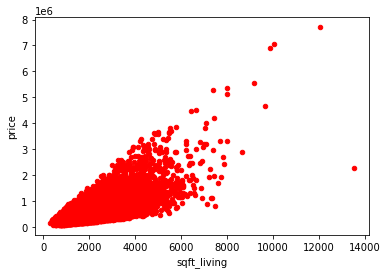

In [34]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='sqft_living',y='price',color='red')
plt.show()

In [39]:
#extract x and y from our data
#x=df["sqft_living"].values[:,np.newaxis]
x=df["sqft_living"].values.reshape(-1,1)
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64028973457.875786
R squared 0.503447918566789


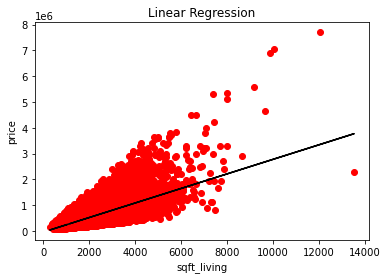

In [40]:
#Linear Regression plot
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")#Plotting our linear regression model
plt.show()

In [41]:
#Linear Regression Coefficient
a=model.coef_
b=model.intercept_
print(a)
print(b)

[281.95077471]
-46430.94680438831


In [50]:
import numpy as np
new_array=np.array([100])
model.predict(new_array.reshape(-1,1))

array([-18235.86933343])

# Multi-Linear Regression

In [54]:
#extract x and y from our data
x=df[["sqft_living","grade","sqft_above"]]  #we have more than one input

y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
a=model.coef_
b=model.intercept_
print(a)
print(b)

MSE 56491826520.69119
R squared 0.5506447968473247
[ 2.37697911e+02  1.10216161e+05 -7.68190492e+01]
-661281.7241284265


In [69]:
multiple_array=np.array([100,100,100])
model.predict(multiple_array.reshape(1,-1))

array([10376422.27200742])

Multi Linear regression gives a better R squared and lowest MSE than the linear regression

# Polynomial Regression

In [74]:
print (df.dtypes)

price            float64
sqft_living      float64
grade            float64
sqft_above       float64
bedrooms           int64
bathrooms        float64
floors           float64
waterfront         int64
view               int64
sqft_basement      int64
yr_renovated       int64
lat              float64
sqft_living15      int64
dtype: object


In [79]:
#Convert features of int into float
df['sqft_living'] = df['sqft_living'].astype(float)
df['grade'] = df['grade'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)

df

,price,sqft_living,grade,sqft_above,bedrooms,bathrooms,floors,waterfront,view,sqft_basement,yr_renovated,lat,sqft_living15
0,221900.0,1180.0,7.0,1180.0,3,1.00,1.0,0,0,0,0,47.5112,1340
1,538000.0,2570.0,7.0,2170.0,3,2.25,2.0,0,0,400,1991,47.7210,1690
2,180000.0,770.0,6.0,770.0,2,1.00,1.0,0,0,0,0,47.7379,2720
3,604000.0,1960.0,7.0,1050.0,4,3.00,1.0,0,0,910,0,47.5208,1360
4,510000.0,1680.0,8.0,1680.0,3,2.00,1.0,0,0,0,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530.0,8.0,1530.0,3,2.50,3.0,0,0,0,0,47.6993,1530
21609,400000.0,2310.0,8.0,2310.0,4,2.50,2.0,0,0,0,0,47.5107,1830
21610,402101.0,1020.0,7.0,1020.0,2,0.75,2.0,0,0,0,0,47.5944,1020
21611,400000.0,1600.0,8.0,1600.0,3,2.50,2.0,0,0,0,0,47.5345,1410


In [85]:
x_=poly.fit_transform(x)

In [89]:
#Let's apply polynomial regression in our case
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[["sqft_living","grade","sqft_above"]].values
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49203268459.09456
R squared:  0.6086204667835631


In [90]:
model.predict(multiple_array.reshape(1,-1))

array([10376422.27200742])

Polynomial regression gives a better R squared and lowest MSE than both linear and multiple regressions